# Some analysis on the final videos

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import re

# Plotting style
sns.set_theme(style="whitegrid")
%matplotlib inline

# --- CONFIGURATION ---
DATA_DIR = "/home/phd2/Documenti/embryo/marilena_videos/final_videos"

In [2]:
data_records = []

print("Scanning directory...")

# Pattern to extract hours from filename: matches "_12.50h.jpg"
time_pattern = re.compile(r"_([0-9]+\.[0-9]+)h\.jpg$")

# Iterate Years
for year in sorted(os.listdir(DATA_DIR)):
    year_path = os.path.join(DATA_DIR, year)
    if not os.path.isdir(year_path): continue
        
    # Iterate Videos
    for video in os.listdir(year_path):
        video_path = os.path.join(year_path, video)
        if not os.path.isdir(video_path): continue
            
        # Iterate Frames
        files = sorted([f for f in os.listdir(video_path) if f.endswith(".jpg")])
        
        for fname in files:
            # Extract time from filename if present
            match = time_pattern.search(fname)
            time_h = float(match.group(1)) if match else 0.0
            
            data_records.append({
                "year": year,
                "video_id": video,
                "filename": fname,
                "time_h": time_h,
                "full_path": os.path.join(video_path, fname)
            })

# Create DataFrame
df = pd.DataFrame(data_records)
print(f"Loaded {len(df)} frames from {df['video_id'].nunique()} videos.")
df.head()

Scanning directory...
Loaded 55489 frames from 168 videos.


,year,video_id,filename,time_h,full_path
0,GV_to_GV,D2019.06.20_S01903_I0406_D_1,D2019.06.20_S01903_I0406_D_1_10_0_2.25h.jpg,2.25,/home/phd2/Documenti/embryo/marilena_videos/fi...
1,GV_to_GV,D2019.06.20_S01903_I0406_D_1,D2019.06.20_S01903_I0406_D_1_11_0_2.50h.jpg,2.50,/home/phd2/Documenti/embryo/marilena_videos/fi...
2,GV_to_GV,D2019.06.20_S01903_I0406_D_1,D2019.06.20_S01903_I0406_D_1_12_0_2.75h.jpg,2.75,/home/phd2/Documenti/embryo/marilena_videos/fi...
3,GV_to_GV,D2019.06.20_S01903_I0406_D_1,D2019.06.20_S01903_I0406_D_1_13_0_3.00h.jpg,3.00,/home/phd2/Documenti/embryo/marilena_videos/fi...
4,GV_to_GV,D2019.06.20_S01903_I0406_D_1,D2019.06.20_S01903_I0406_D_1_14_0_3.25h.jpg,3.25,/home/phd2/Documenti/embryo/marilena_videos/fi...


In [3]:
# Group by video to get summary stats
video_stats = df.groupby(['year', 'video_id']).agg(
    num_frames=('filename', 'count'),
    duration_h=('time_h', 'max'),
    start_h=('time_h', 'min') # Should be 0.0 usually
).reset_index()

# Display summary
display(video_stats.describe())

# Top 5 longest videos
print("Longest Videos:")
display(video_stats.sort_values('duration_h', ascending=False).head(5))

,num_frames,duration_h,start_h
count,168.000000,168.000000,168.0
mean,330.291667,69.460774,0.0
std,269.847070,51.572699,0.0
min,72.000000,17.850000,0.0
25%,91.000000,22.760000,0.0
50%,98.000000,24.400000,0.0
75%,575.000000,115.115000,0.0
max,896.000000,160.220000,0.0


Longest Videos:


,year,video_id,num_frames,duration_h,start_h
104,M2_to_blasto,D2021.09.21_S01044_I3026_P_3,896,160.22,0.0
157,rM2_to_no_blasto,D2021.09.20_S02890_I0057_P_5,828,143.99,0.0
156,rM2_to_no_blasto,D2021.09.20_S02890_I0057_P_4,828,143.99,0.0
154,rM2_to_no_blasto,D2021.09.20_S02890_I0057_P_2,828,143.99,0.0
137,rM2_to_no_blasto,D2017.09.16_S0772_I631_4,553,140.04,0.0


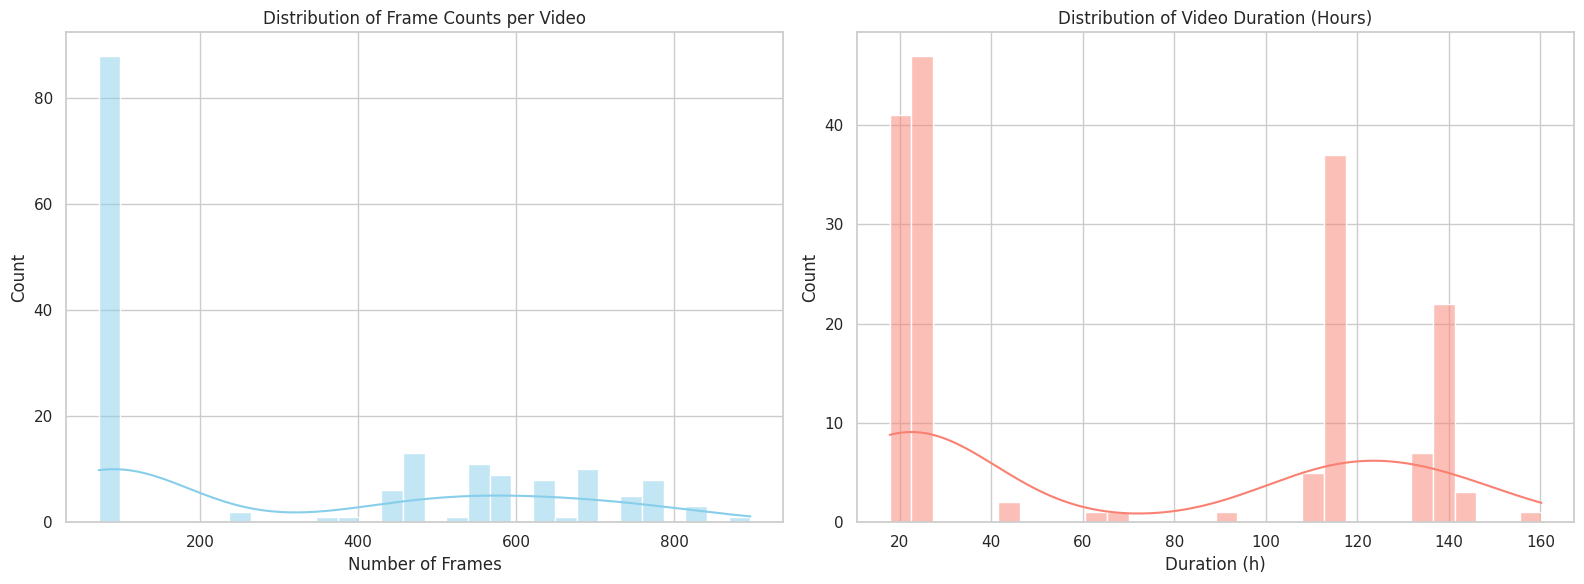

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram: Number of Frames
sns.histplot(data=video_stats, x="num_frames", bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Frame Counts per Video")
axes[0].set_xlabel("Number of Frames")

# Histogram: Duration in Hours
sns.histplot(data=video_stats, x="duration_h", bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of Video Duration (Hours)")
axes[1].set_xlabel("Duration (h)")

plt.tight_layout()
plt.show()

Average time between frames: 0.2109 hours (12.66 minutes)
Median time between frames:  0.2000 hours (12.00 minutes)


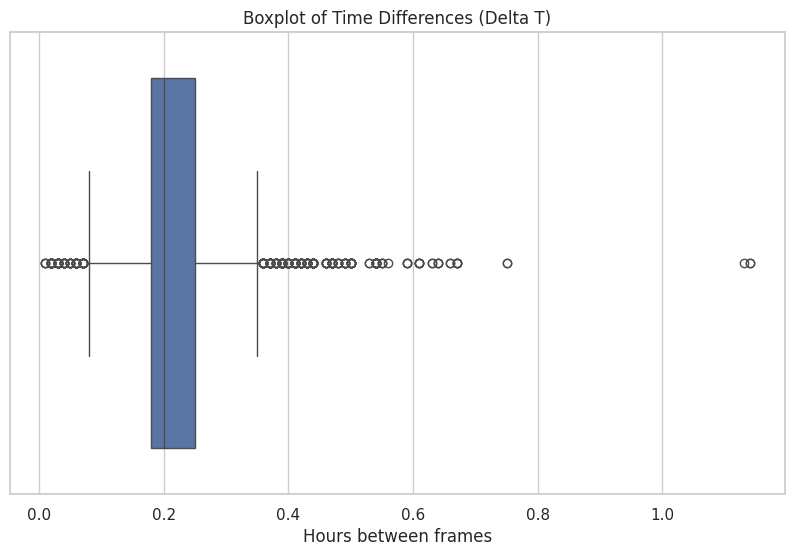

Found 3 instances where gap > 0.99h
Examples of large gaps between frames:


,video_id,time_h,delta_t
42984,D2017.09.16_S0772_I631_5,94.83,1.14
33902,D2017.09.16_S0772_I631_6,94.83,1.14
45877,D2017.09.16_S0772_I631_4,94.82,1.13


Examples of small gaps between frames:


,video_id,time_h,delta_t
45877,D2017.09.16_S0772_I631_4,94.82,1.13
42984,D2017.09.16_S0772_I631_5,94.83,1.14
33902,D2017.09.16_S0772_I631_6,94.83,1.14


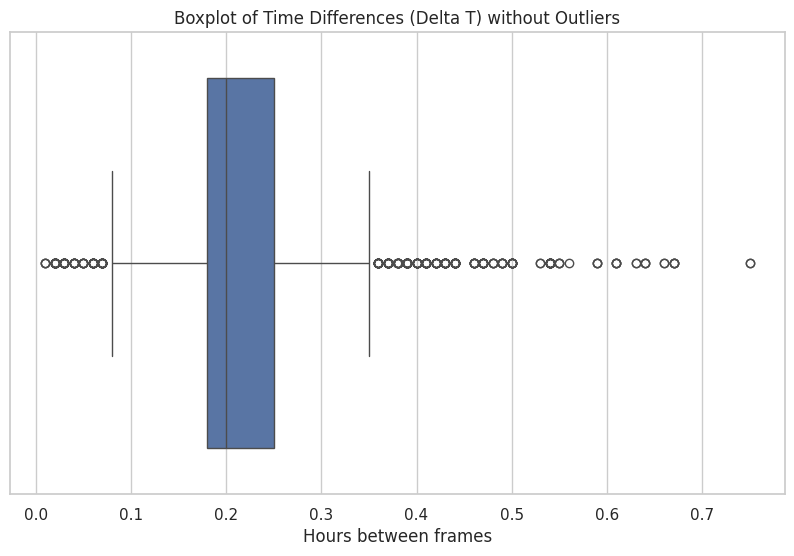

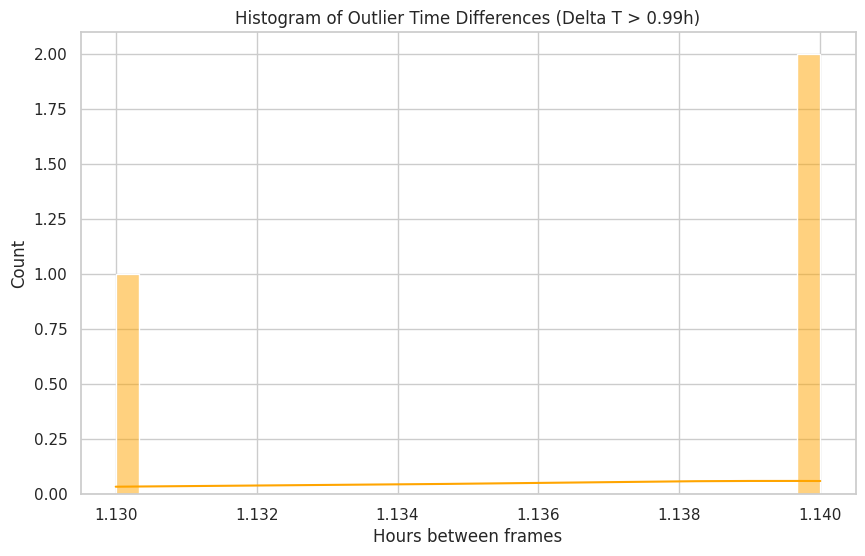

Videos with outliers (gaps > 0.99h):
- D2017.09.16_S0772_I631_4
- D2017.09.16_S0772_I631_5
- D2017.09.16_S0772_I631_6
Videos without outliers:
- D2016.11.14_S1895_I106_6
- D2016.11.14_S1895_I106_7
- D2016.11.14_S1895_I106_8
- D2016.11.15_S1896_I106_6
- D2016.11.15_S1896_I106_7
- D2017.09.15_S0770_I631_1
- D2017.09.15_S0770_I631_2
- D2017.09.15_S0770_I631_3
- D2017.09.15_S0770_I631_4
- D2017.09.15_S0770_I631_5
- D2018.09.18_S01710_I0406_D_1
- D2018.09.18_S01710_I0406_D_2
- D2018.09.18_S01710_I0406_D_4
- D2018.09.18_S01711_I0406_D_1
- D2018.09.18_S01711_I0406_D_2
- D2018.09.18_S01711_I0406_D_3
- D2018.09.18_S01711_I0406_D_4
- D2018.09.18_S01711_I0406_D_5
- D2018.09.19_S01714_I0406_D_11
- D2018.09.19_S01714_I0406_D_8


In [5]:
# Calculate Delta T for every frame within its video group
# We sort by video and time first
df = df.sort_values(['video_id', 'time_h'])
df['delta_t'] = df.groupby('video_id')['time_h'].diff()

# Filter out the first frame of each video (NaN)
delta_t_clean = df['delta_t'].dropna()

# Statistics
mean_dt = delta_t_clean.mean()
median_dt = delta_t_clean.median()
print(f"Average time between frames: {mean_dt:.4f} hours ({mean_dt*60:.2f} minutes)")
print(f"Median time between frames:  {median_dt:.4f} hours ({median_dt*60:.2f} minutes)")

# Visualize Deltas
plt.figure(figsize=(10, 6))
sns.boxplot(x=delta_t_clean)
plt.title("Boxplot of Time Differences (Delta T)")
plt.xlabel("Hours between frames")
plt.show()

# Detect Outliers (Potential missing frames)
threshold = 0.99  # 1 hour threshold
outliers = df[df['delta_t'] > threshold]
print(f"Found {len(outliers)} instances where gap > {threshold:.2f}h")
if not outliers.empty:
    # show some examples, first the longest gaps
    outliers = outliers.sort_values('delta_t', ascending=False)
    print("Examples of large gaps between frames:")
    display(outliers[['video_id', 'time_h', 'delta_t']].head(10))

    # show some examples, first the shortest gaps
    outliers = outliers.sort_values('delta_t', ascending=True)
    print("Examples of small gaps between frames:")
    display(outliers[['video_id', 'time_h', 'delta_t']].head(10))

# revisualize plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=delta_t_clean[delta_t_clean <= threshold])
plt.title("Boxplot of Time Differences (Delta T) without Outliers")
plt.xlabel("Hours between frames")
plt.show()

# visualize hist of the outliers
plt.figure(figsize=(10, 6))
sns.histplot(outliers['delta_t'], bins=30, kde=True, color='orange')
plt.title("Histogram of Outlier Time Differences (Delta T > 0.99h)")
plt.xlabel("Hours between frames")
plt.show()

# print some IDs of videos with outliers and some without outliers
videos_with_outliers = outliers['video_id'].unique()
print(f"Videos with outliers (gaps > {threshold:.2f}h):")
for vid in videos_with_outliers[:10]:  # show first 10
    print(f"- {vid}")

videos_without_outliers = df[~df['video_id'].isin(videos_with_outliers)]['video_id'].unique()
print(f"Videos without outliers:")
for vid in videos_without_outliers[:20]:  # show first 10
    print(f"- {vid}")